# Árboles para Series de Tiempo

En muchas ocasiones los árboles no son buenos manejando las tendencia, por eso se sugiere
quitar la tendencia y analizar la serie sin tendencia.

In [3]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn
import os

# Establecer 2 decimales
pd.options.display.float_format = '{:.3f}'.format

In [7]:
ruta = "C:\\Users\\Embag\\OneDrive\\Documents\\datos-1.xlsx"

# Lee el archivo Excel
renta = pd.read_excel(ruta,usecols="B")

# Muestra las primeras filas del DataFrame
print(renta.head())
renta.size

      I_Renta
0  558409.119
1  788813.584
2  408698.749
3 1071976.642
4  510893.423


288

In [18]:
indice = pd.date_range(start='01/01/2000', periods=288, freq='ME')
indice
rentats =pd.DataFrame(renta['I_Renta'].values, index=indice, columns=['I_Renta'])
type(rentats)

pandas.core.frame.DataFrame

In [20]:
print(rentats.head(6))

               I_Renta
2000-01-31  558409.119
2000-02-29  788813.584
2000-03-31  408698.749
2000-04-30 1071976.642
2000-05-31  510893.423
2000-06-30  921572.842


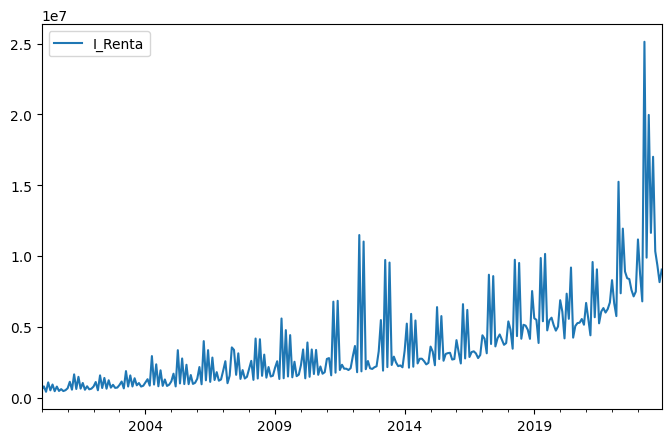

In [21]:
rentats.plot(figsize=(8,5))
pyplot.show()

In [22]:
lrentats = np.log(rentats)

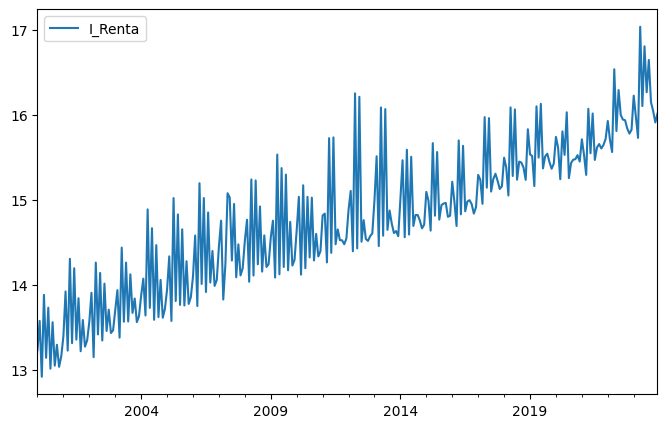

In [23]:
lrentats.plot(figsize=(8,5))
pyplot.show()

In [24]:
dlrentats = lrentats.diff()
print(dlrentats.head(6))
dlrentats.size

            I_Renta
2000-01-31      NaN
2000-02-29    0.345
2000-03-31   -0.658
2000-04-30    0.964
2000-05-31   -0.741
2000-06-30    0.590


288

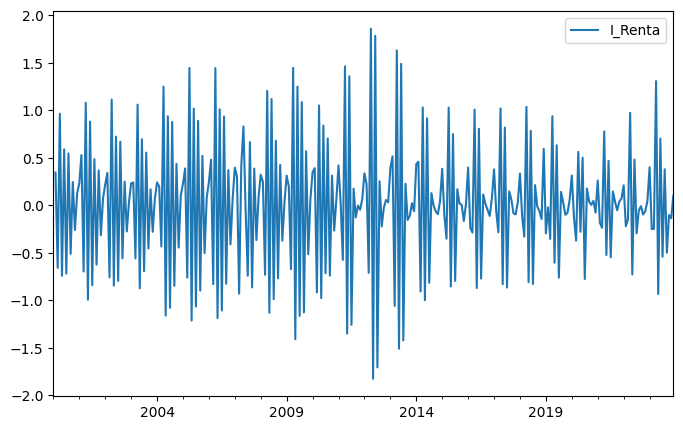

In [25]:
dlrentats.plot(figsize=(8,5))
pyplot.show()

#### Creando componente estacional 

In [7]:
date_time=indice
type(date_time)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
date_time.map(pd.Timestamp.timestamp)

Index([ 949276800.0,  951782400.0,  954460800.0,  957052800.0,  959731200.0,
        962323200.0,  965001600.0,  967680000.0,  970272000.0,  972950400.0,
       ...
       1680220800.0, 1682812800.0, 1685491200.0, 1688083200.0, 1690761600.0,
       1693440000.0, 1696032000.0, 1698710400.0, 1701302400.0, 1703980800.0],
      dtype='float64', length=288)

In [9]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

Index([ 949276800.0,  951782400.0,  954460800.0,  957052800.0,  959731200.0,
        962323200.0,  965001600.0,  967680000.0,  970272000.0,  972950400.0,
       ...
       1680220800.0, 1682812800.0, 1685491200.0, 1688083200.0, 1690761600.0,
       1693440000.0, 1696032000.0, 1698710400.0, 1701302400.0, 1703980800.0],
      dtype='float64', length=288)

## Creación de variables rezagadas

In [26]:
from pandas import DataFrame
# reframe as supervised learning
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [27]:
for i in range(3,0,-1):
    df1[['t-'+str(i)]] = dlrentats.shift(i)

for i in range(12,8,-1):
    df1[['t-'+str(i)]] = dlrentats.shift(i)

print(df1.head(14))

              t-3    t-2    t-1  t-12   t-11   t-10    t-9
2000-01-31    NaN    NaN    NaN   NaN    NaN    NaN    NaN
2000-02-29    NaN    NaN    NaN   NaN    NaN    NaN    NaN
2000-03-31    NaN    NaN  0.345   NaN    NaN    NaN    NaN
2000-04-30    NaN  0.345 -0.658   NaN    NaN    NaN    NaN
2000-05-31  0.345 -0.658  0.964   NaN    NaN    NaN    NaN
2000-06-30 -0.658  0.964 -0.741   NaN    NaN    NaN    NaN
2000-07-31  0.964 -0.741  0.590   NaN    NaN    NaN    NaN
2000-08-31 -0.741  0.590 -0.718   NaN    NaN    NaN    NaN
2000-09-30  0.590 -0.718  0.546   NaN    NaN    NaN    NaN
2000-10-31 -0.718  0.546 -0.511   NaN    NaN    NaN    NaN
2000-11-30  0.546 -0.511  0.246   NaN    NaN    NaN  0.345
2000-12-31 -0.511  0.246 -0.259   NaN    NaN  0.345 -0.658
2001-01-31  0.246 -0.259  0.123   NaN  0.345 -0.658  0.964
2001-02-28 -0.259  0.123  0.234 0.345 -0.658  0.964 -0.741


In [28]:
# Create column t
df1['t'] = dlrentats.values
print(df1.head(14))

              t-3    t-2    t-1  t-12   t-11   t-10    t-9      t
2000-01-31    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN
2000-02-29    NaN    NaN    NaN   NaN    NaN    NaN    NaN  0.345
2000-03-31    NaN    NaN  0.345   NaN    NaN    NaN    NaN -0.658
2000-04-30    NaN  0.345 -0.658   NaN    NaN    NaN    NaN  0.964
2000-05-31  0.345 -0.658  0.964   NaN    NaN    NaN    NaN -0.741
2000-06-30 -0.658  0.964 -0.741   NaN    NaN    NaN    NaN  0.590
2000-07-31  0.964 -0.741  0.590   NaN    NaN    NaN    NaN -0.718
2000-08-31 -0.741  0.590 -0.718   NaN    NaN    NaN    NaN  0.546
2000-09-30  0.590 -0.718  0.546   NaN    NaN    NaN    NaN -0.511
2000-10-31 -0.718  0.546 -0.511   NaN    NaN    NaN    NaN  0.246
2000-11-30  0.546 -0.511  0.246   NaN    NaN    NaN  0.345 -0.259
2000-12-31 -0.511  0.246 -0.259   NaN    NaN  0.345 -0.658  0.123
2001-01-31  0.246 -0.259  0.123   NaN  0.345 -0.658  0.964  0.234
2001-02-28 -0.259  0.123  0.234 0.345 -0.658  0.964 -0.741  0.530


In [29]:
# Periodos
anio = 365.25 * 24 * 60 * 60  # segundos en un año

# Componentes estacionales anuales
dlrentats['Year sin'] = np.sin(timestamp_s * (2 * np.pi / anio))
dlrentats['Year cos'] = np.cos(timestamp_s * (2 * np.pi / anio))

In [30]:
### Incorporando las componentes de Fourier
df1['Year sin']=dlrentats['Year sin']
df1['Year cos']=dlrentats['Year cos']

In [31]:
### Organizar las componentes de Fourier al inicio de el df
df1 = df1[['Year sin', 'Year cos'] + [col for col in df1.columns if col not in ['Year sin', 'Year cos']]]

In [32]:
print(df1.head(16))

            Year sin  Year cos    t-3    t-2    t-1   t-12   t-11   t-10  \
2000-01-31     0.486     0.874    NaN    NaN    NaN    NaN    NaN    NaN   
2000-02-29     0.845     0.535    NaN    NaN    NaN    NaN    NaN    NaN   
2000-03-31     1.000     0.031    NaN    NaN  0.345    NaN    NaN    NaN   
2000-04-30     0.885    -0.466    NaN  0.345 -0.658    NaN    NaN    NaN   
2000-05-31     0.525    -0.851  0.345 -0.658  0.964    NaN    NaN    NaN   
2000-06-30     0.037    -0.999 -0.658  0.964 -0.741    NaN    NaN    NaN   
2000-07-31    -0.477    -0.879  0.964 -0.741  0.590    NaN    NaN    NaN   
2000-08-31    -0.857    -0.515 -0.741  0.590 -0.718    NaN    NaN    NaN   
2000-09-30    -1.000    -0.025  0.590 -0.718  0.546    NaN    NaN    NaN   
2000-10-31    -0.873     0.487 -0.718  0.546 -0.511    NaN    NaN    NaN   
2000-11-30    -0.519     0.855  0.546 -0.511  0.246    NaN    NaN    NaN   
2000-12-31    -0.013     1.000 -0.511  0.246 -0.259    NaN    NaN  0.345   
2001-01-31  

In [33]:
# Nuevo df, eliminando los Nans
df1_renta = df1[13:]
print(df1_renta)
df1_renta.size

            Year sin  Year cos    t-3    t-2    t-1   t-12   t-11   t-10  \
2001-02-28     0.843     0.539 -0.259  0.123  0.234  0.345 -0.658  0.964   
2001-03-31     0.999     0.035  0.123  0.234  0.530 -0.658  0.964 -0.741   
2001-04-30     0.887    -0.462  0.234  0.530 -0.696  0.964 -0.741  0.590   
2001-05-31     0.529    -0.849  0.530 -0.696  1.080 -0.741  0.590 -0.718   
2001-06-30     0.041    -0.999 -0.696  1.080 -0.992  0.590 -0.718  0.546   
...              ...       ...    ...    ...    ...    ...    ...    ...   
2023-08-31    -0.851    -0.526 -0.933  0.703 -0.540 -0.055 -0.007 -0.097   
2023-09-30    -0.999    -0.038  0.703 -0.540  0.380 -0.007 -0.097 -0.061   
2023-10-31    -0.880     0.476 -0.540  0.380 -0.498 -0.097 -0.061  0.046   
2023-11-30    -0.530     0.848  0.380 -0.498 -0.102 -0.061  0.046  0.401   
2023-12-31    -0.026     1.000 -0.498 -0.102 -0.135  0.046  0.401 -0.250   

              t-9      t  
2001-02-28 -0.741  0.530  
2001-03-31  0.590 -0.696  
2001-0

2750

skforecast  es una librería de python que permite "
Time series forecasting with scikit-learn regressors", la cual permiten desde la partición de los datos, y la cración del aprendizaje supervisado.Funciona bien con las funciones de sklearn. Ver https://joaquinamatrodrigo.github.io/skforecast/0.5.0/index.html.

In [34]:
df1_renta.values

array([[ 0.84257209,  0.53858358, -0.25897786, ...,  0.96428122,
        -0.74109855,  0.52964232],
       [ 0.99937065,  0.03547256,  0.1228775 , ..., -0.74109855,
         0.58992082, -0.69587961],
       [ 0.88672106, -0.46230483,  0.23411531, ...,  0.58992082,
        -0.71769136,  1.07991096],
       ...,
       [-0.87966221,  0.47559899, -0.54013544, ...,  0.04607047,
         0.40050581, -0.10243836],
       [-0.53040546,  0.84774409,  0.37986688, ...,  0.40050581,
        -0.2498892 , -0.1348446 ],
       [-0.02580077,  0.9996671 , -0.49798754, ..., -0.2498892 ,
        -0.24705061,  0.10322778]])

<h2 style="color: #e67e22; text-align: left;">Dividir los datos</h2>

In [35]:
# Split data

rentasplit = df1_renta.values
# split into lagged variables and original time series
X1= rentasplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =rentasplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [37]:
print(X1[0])
print(y1[0]) 

[ 0.84257209  0.53858358 -0.25897786  0.1228775   0.23411531  0.34543814
 -0.65755169  0.96428122 -0.74109855]
0.5296423236373844


**Conjunto de entrenamiento (70%), validación (10%) y prueba (20%)** variable respuesta:

In [87]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.72)
valtarget_size = int(len(Y1) * 0.18)# Set split
testtarget_size = int(len(Y1) * 0.10)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

# Se debe adicionar en este caso una observación a algún conjunto de datos, en este caso es para el conjunto de validación

Complete Observations for Target after Supervised configuration: 275
198 49 27
Train + Validation + Test: 274


Se le suma 1 al conjunto de validación:

In [89]:
# Target Train-Validation-Test split(70-10-20)
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.72)-1
valtarget_size = int(len(Y1) * 0.18)+1# Set split
testtarget_size = int(len(Y1) * 0.10)+1# Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 275
Training Observations for Target: 197
Validation Observations for Target: 50
Test Observations for Target: 28


**Conjunto de entrenamiento (70%), validación (10%) y prueba (20%)**  variables rezagadas:

In [90]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.72)-1
valfeature_size = int(len(X1) * 0.18)+1# Set split
testfeature_size = int(len(X1) * 0.10)+1# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))


Observations for Feature: 275
Training Observations for Feature: 197
Validation Observations for Feature: 50
Test Observations for Feature: 28


<h2 style="color: #e67e22; text-align: left;">Selección de la profundidad óptima del árbol</h2>

Selecciona la profundidad máxima: Hasta que todas las hojas sean puras.

**La profundidad (o depth):** es una medida que indica el número máximo de niveles que hay desde la raíz hasta una hoja en el árbol. Es una forma de cuantificar la complejidad del árbol y su capacidad para capturar patrones en los datos.

In [41]:
# Decision Tree Regresion Model


from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_renta = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_renta.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_renta.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_renta.score(val_feature,val_target))  # predictions are horrible if negative value, no relationship if 0
print("el RECM sobre validación es:",(((decision_tree_renta.predict(val_feature)-val_target)**2).mean()) )


Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: 0.8579481220853136
el RECM sobre validación es: 0.042699536235306125


In [42]:
num_features = decision_tree_renta.n_features_in_

# Print the number of features used by the model
print(f"Number of features used by the model: {num_features}")
feature_names = decision_tree_renta.columns.tolist()

Number of features used by the model: 9


AttributeError: 'DecisionTreeRegressor' object has no attribute 'columns'

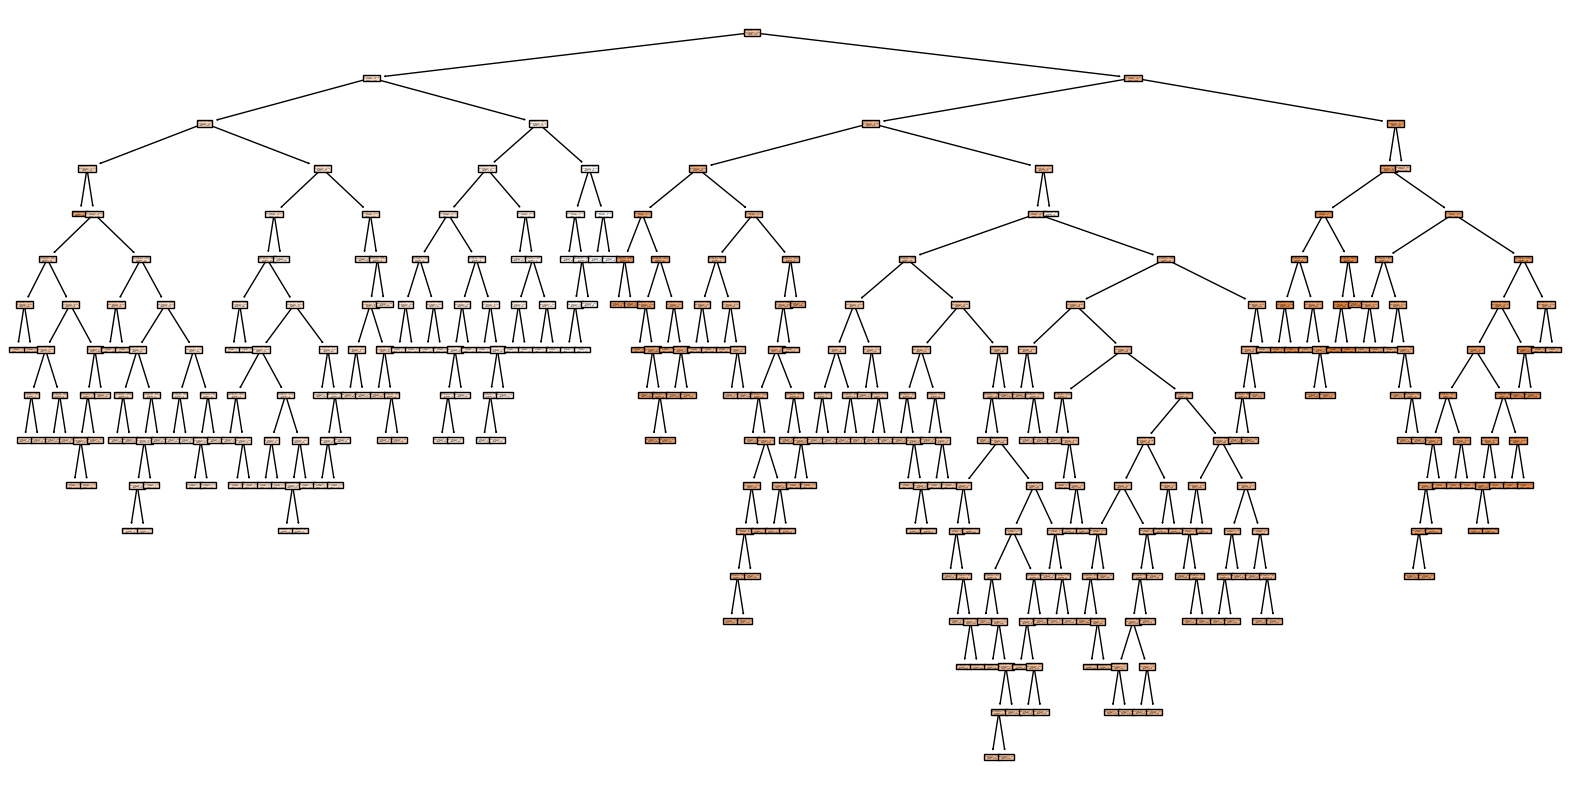

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura según sea necesario
plot_tree(decision_tree_renta, filled=True, feature_names=['Feature 1', 'Feature 2','Feature 3', 'Feature 4','Feature 5', 'Feature 6','Feature 7', 'Feature 8','Feature 9', 'Feature 10','Feature 11', 'Feature 12'])
plt.show()

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse(with respect to predict with sample mean)). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

En esta primera parte se puede observar un gran sobreajuste, debido al R2 sobre el conjunto de entrenamiento y el R2 sobre el conjunto de validacion. Es por eso que ahora se intenta buscar la mejor profundidad

In [91]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15]:
    # Create the tree and fit it
    decision_tree_renta = DecisionTreeRegressor(max_depth=d)
    decision_tree_renta.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_renta.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_renta.score(val_feature, val_target))  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_renta.predict(val_feature),val_target, squared=False), '\n')



max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8083717420262331
Coeficiente R2 sobre el conjunto de validación: 0.48841849526738124
el RECM sobre el conjunto de validación es: 0.3209005708108072 

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8742441894415549
Coeficiente R2 sobre el conjunto de validación: 0.6010481950403672
el RECM sobre el conjunto de validación es: 0.28338267091146235 

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9299889111082164
Coeficiente R2 sobre el conjunto de validación: 0.6429409694504618
el RECM sobre el conjunto de validación es: 0.2680915235972627 

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9657897013588774
Coeficiente R2 sobre el conjunto de validación: -0.2894244980279037
el RECM sobre el conjunto de validación es: 0.5094611020461012 

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9850260691391937
Coeficiente R2 sobre el conjunto de validación: 0.7727

C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Note que el RECM menor es con un depth de 6

<h2 style="color: #e67e22; text-align: left;">Usando la penalización</h2>

El método de poda basado en el costo de complejidad ayuda a encontrar el equilibrio entre la complejidad del modelo y su rendimiento. A medida que se aumenta **ccp_alpha**, el árbol se simplifica, lo que puede reducir el sobreajuste.

In [92]:
path=decision_tree_renta.cost_complexity_pruning_path(train_feature, train_target)
alphas=path['ccp_alphas']
print(alphas)
print(alphas.min())
print(alphas.max())
div=15

[0.00000000e+00 3.14103915e-11 2.40387829e-09 4.25655933e-09
 6.48073049e-09 7.85715449e-09 8.75096287e-09 1.38587586e-08
 1.60727948e-08 1.63619451e-08 1.67284671e-08 1.68698112e-08
 1.71781119e-08 2.53226799e-08 3.74371304e-08 4.03036033e-08
 4.74718430e-08 6.74845491e-08 6.81575492e-08 9.19189852e-08
 9.69697970e-08 1.64562422e-07 1.88430450e-07 1.96702514e-07
 2.04999946e-07 2.18677705e-07 2.19038726e-07 2.35943845e-07
 2.52914654e-07 2.74759124e-07 2.76784536e-07 2.89605708e-07
 3.27740443e-07 3.48145789e-07 3.51598133e-07 3.53352594e-07
 3.66808397e-07 3.94014963e-07 3.94108700e-07 4.01761918e-07
 4.08442930e-07 4.24864847e-07 4.45819911e-07 4.54204183e-07
 4.95813931e-07 5.45050843e-07 5.59881185e-07 8.64514924e-07
 8.98121774e-07 9.21395148e-07 9.35432974e-07 9.71576373e-07
 1.01694422e-06 1.06865845e-06 1.09181158e-06 1.18596565e-06
 1.26284516e-06 1.30231672e-06 1.38863221e-06 1.47952410e-06
 1.74973239e-06 1.75711764e-06 1.75717321e-06 2.11932696e-06
 2.41516481e-06 2.753722

In [93]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import sklearn
import pandas as pd

# Supongamos que ya tienes alphas definidos, así como train_feature, train_target, val_feature, val_target

# Listas para almacenar los resultados
RMSE_train = []
RMSE_test = []

# Evaluar el modelo para cada valor de alpha
for alpha in alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(train_feature, train_target)

    # Predecir en los conjuntos de entrenamiento y validacion
    y_train_pred = tree.predict(train_feature)
    y_val_pred = tree.predict(val_feature)

    # Calcular el RMSE y almacenar en las listas
    train_rmse = mean_squared_error(train_target, y_train_pred, squared=False)
    test_rmse = mean_squared_error(val_target, y_val_pred, squared=False)

    RMSE_train.append(train_rmse)
    RMSE_test.append(test_rmse)

# Convertir los resultados a un DataFrame para fácil visualización
results = pd.DataFrame({
    'Alpha': alphas,
    'Train RMSE': RMSE_train,
    'Test RMSE': RMSE_test
})

# Imprimir el DataFrame
print(results)

# Encontrar el alpha que minimiza el RMSE en los conjuntos de entrenamiento y prueba
optimal_alpha_train = alphas[np.argmin(RMSE_train)]
optimal_alpha_test = alphas[np.argmin(RMSE_test)]

print(f"El alpha óptimo para el conjunto de prueba es: {optimal_alpha_test:.3f}")


C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

     Alpha  Train RMSE  Test RMSE
0    0.000       0.000      0.497
1    0.000       0.000      0.499
2    0.000       0.000      0.498
3    0.000       0.000      0.237
4    0.000       0.000      0.209
..     ...         ...        ...
183  0.008       0.300      0.303
184  0.019       0.300      0.303
185  0.027       0.330      0.321
186  0.082       0.369      0.339
187  0.350       0.467      0.428

[188 rows x 3 columns]
El alpha óptimo para el conjunto de prueba es: 0.000


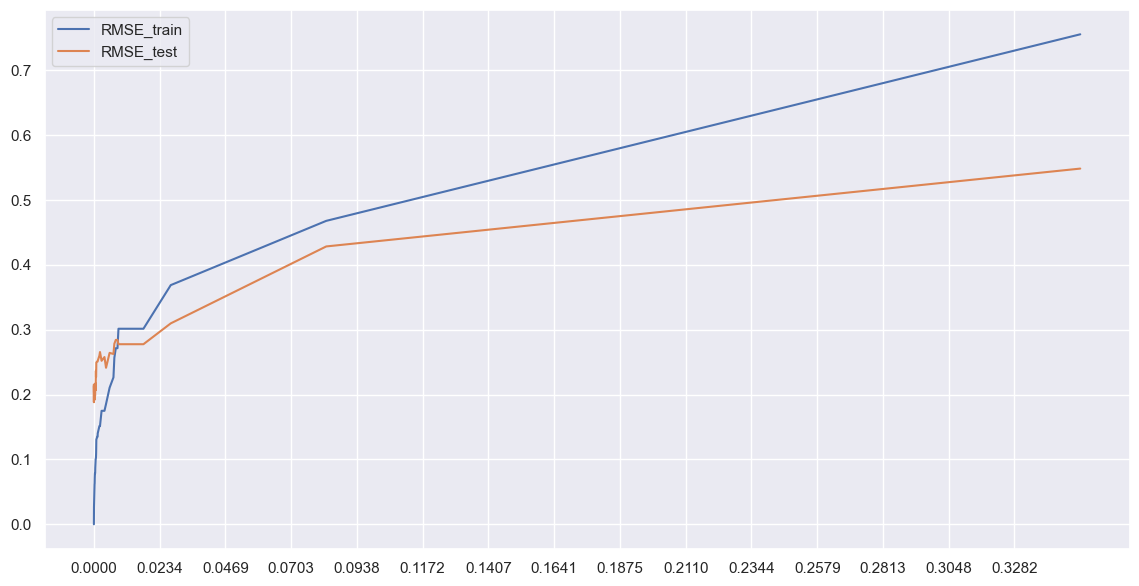

In [47]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))

sns.lineplot(y=RMSE_train,x=alphas,label="RMSE_train")

sns.lineplot(y=RMSE_test,x=alphas,label="RMSE_test")

plt.xticks(ticks=np.arange(0.00,alphas.max(),(alphas.max()-alphas.min())/div
))
plt.show()

Note que le valor de $\alpha$ donde se minimiza el RMSE es  **0**. Vamos a tomar un valor de 0 para alpha y computaremos el árbol basado en ese valor de $\alpha$.

<h2 style="color: #e67e22; text-align: left;">Juntar Entrenamiento y Validación</h2>

In [94]:
print(type(train_feature))
print(type(val_feature))

#######

print(type(train_target))
print(type(val_target))

####
print(train_feature.shape)
print(val_feature.shape)

#####

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(197, 9)
(50, 9)
(197,)
(50,)
(247, 9)
(247,)


**De acuerdo a la profundidad óptima del árbol que es 6:**

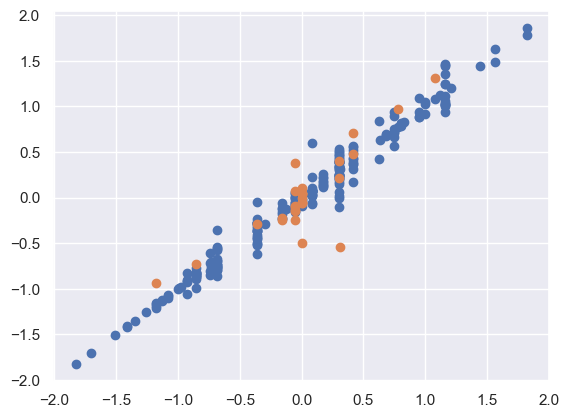

Raíz de la Pérdida cuadrática Entrenamiento: 0.10712454671813983
Raíz de la Pérdida cuadrática Prueba: 0.23574679514814542


C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Embag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [95]:
# Plot predicted against actual values but with train + val

from matplotlib import pyplot as plt

# Use the best max_depth

decision_tree_renta = DecisionTreeRegressor(max_depth=6)  # fill in best max depth here
decision_tree_renta.fit(train_val_feature, train_val_target)

# Predict values for train and test
train_val_prediction = decision_tree_renta.predict(train_val_feature)
test_prediction = decision_tree_renta.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_val_prediction, train_val_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction, train_val_target,squared=False))

print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error(test_prediction, test_target,squared=False))


**De acuerdo a la penalización óptima que es 0:**

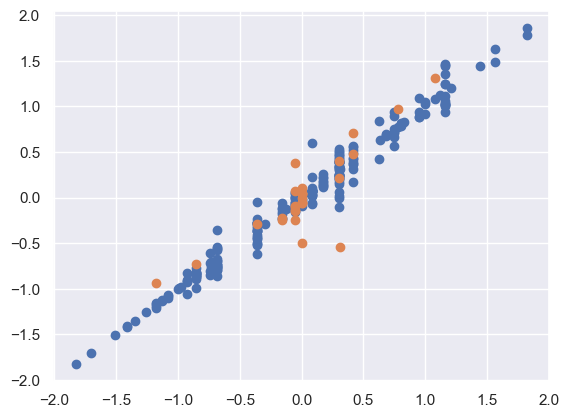

In [96]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth
decision_tree_renta_prun_mincost = DecisionTreeRegressor(ccp_alpha=0)  # fill in best max depth here
decision_tree_renta_prun_mincost.fit(train_val_feature, train_val_target)

# Predict values for train and test
train_val_prediction_prun_mincost = decision_tree_renta.predict(train_val_feature)
test_prediction_prun_mincost = decision_tree_renta.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_val_prediction_prun_mincost, train_val_target, label='train')  # blue
plt.scatter(test_prediction_prun_mincost, test_target, label='test')  # orange
plt.show()

In [97]:
from sklearn import tree

listacaract=list(df1_renta.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_renta)
print(text_representation)

|--- feature_5 <= -0.25
|   |--- feature_4 <= 0.78
|   |   |--- feature_5 <= -1.16
|   |   |   |--- value: [0.83]
|   |   |--- feature_5 >  -1.16
|   |   |   |--- feature_5 <= -0.61
|   |   |   |   |--- feature_2 <= 1.24
|   |   |   |   |   |--- feature_6 <= 1.32
|   |   |   |   |   |   |--- value: [-0.69]
|   |   |   |   |   |--- feature_6 >  1.32
|   |   |   |   |   |   |--- value: [-0.93]
|   |   |   |   |--- feature_2 >  1.24
|   |   |   |   |   |--- value: [-0.13]
|   |   |   |--- feature_5 >  -0.61
|   |   |   |   |--- feature_6 <= 0.01
|   |   |   |   |   |--- value: [0.31]
|   |   |   |   |--- feature_6 >  0.01
|   |   |   |   |   |--- feature_6 <= 1.15
|   |   |   |   |   |   |--- value: [-0.36]
|   |   |   |   |   |--- feature_6 >  1.15
|   |   |   |   |   |   |--- value: [-0.74]
|   |--- feature_4 >  0.78
|   |   |--- feature_4 <= 1.18
|   |   |   |--- feature_3 <= -1.12
|   |   |   |   |--- feature_2 <= 1.23
|   |   |   |   |   |--- value: [-0.99]
|   |   |   |   |--- featu

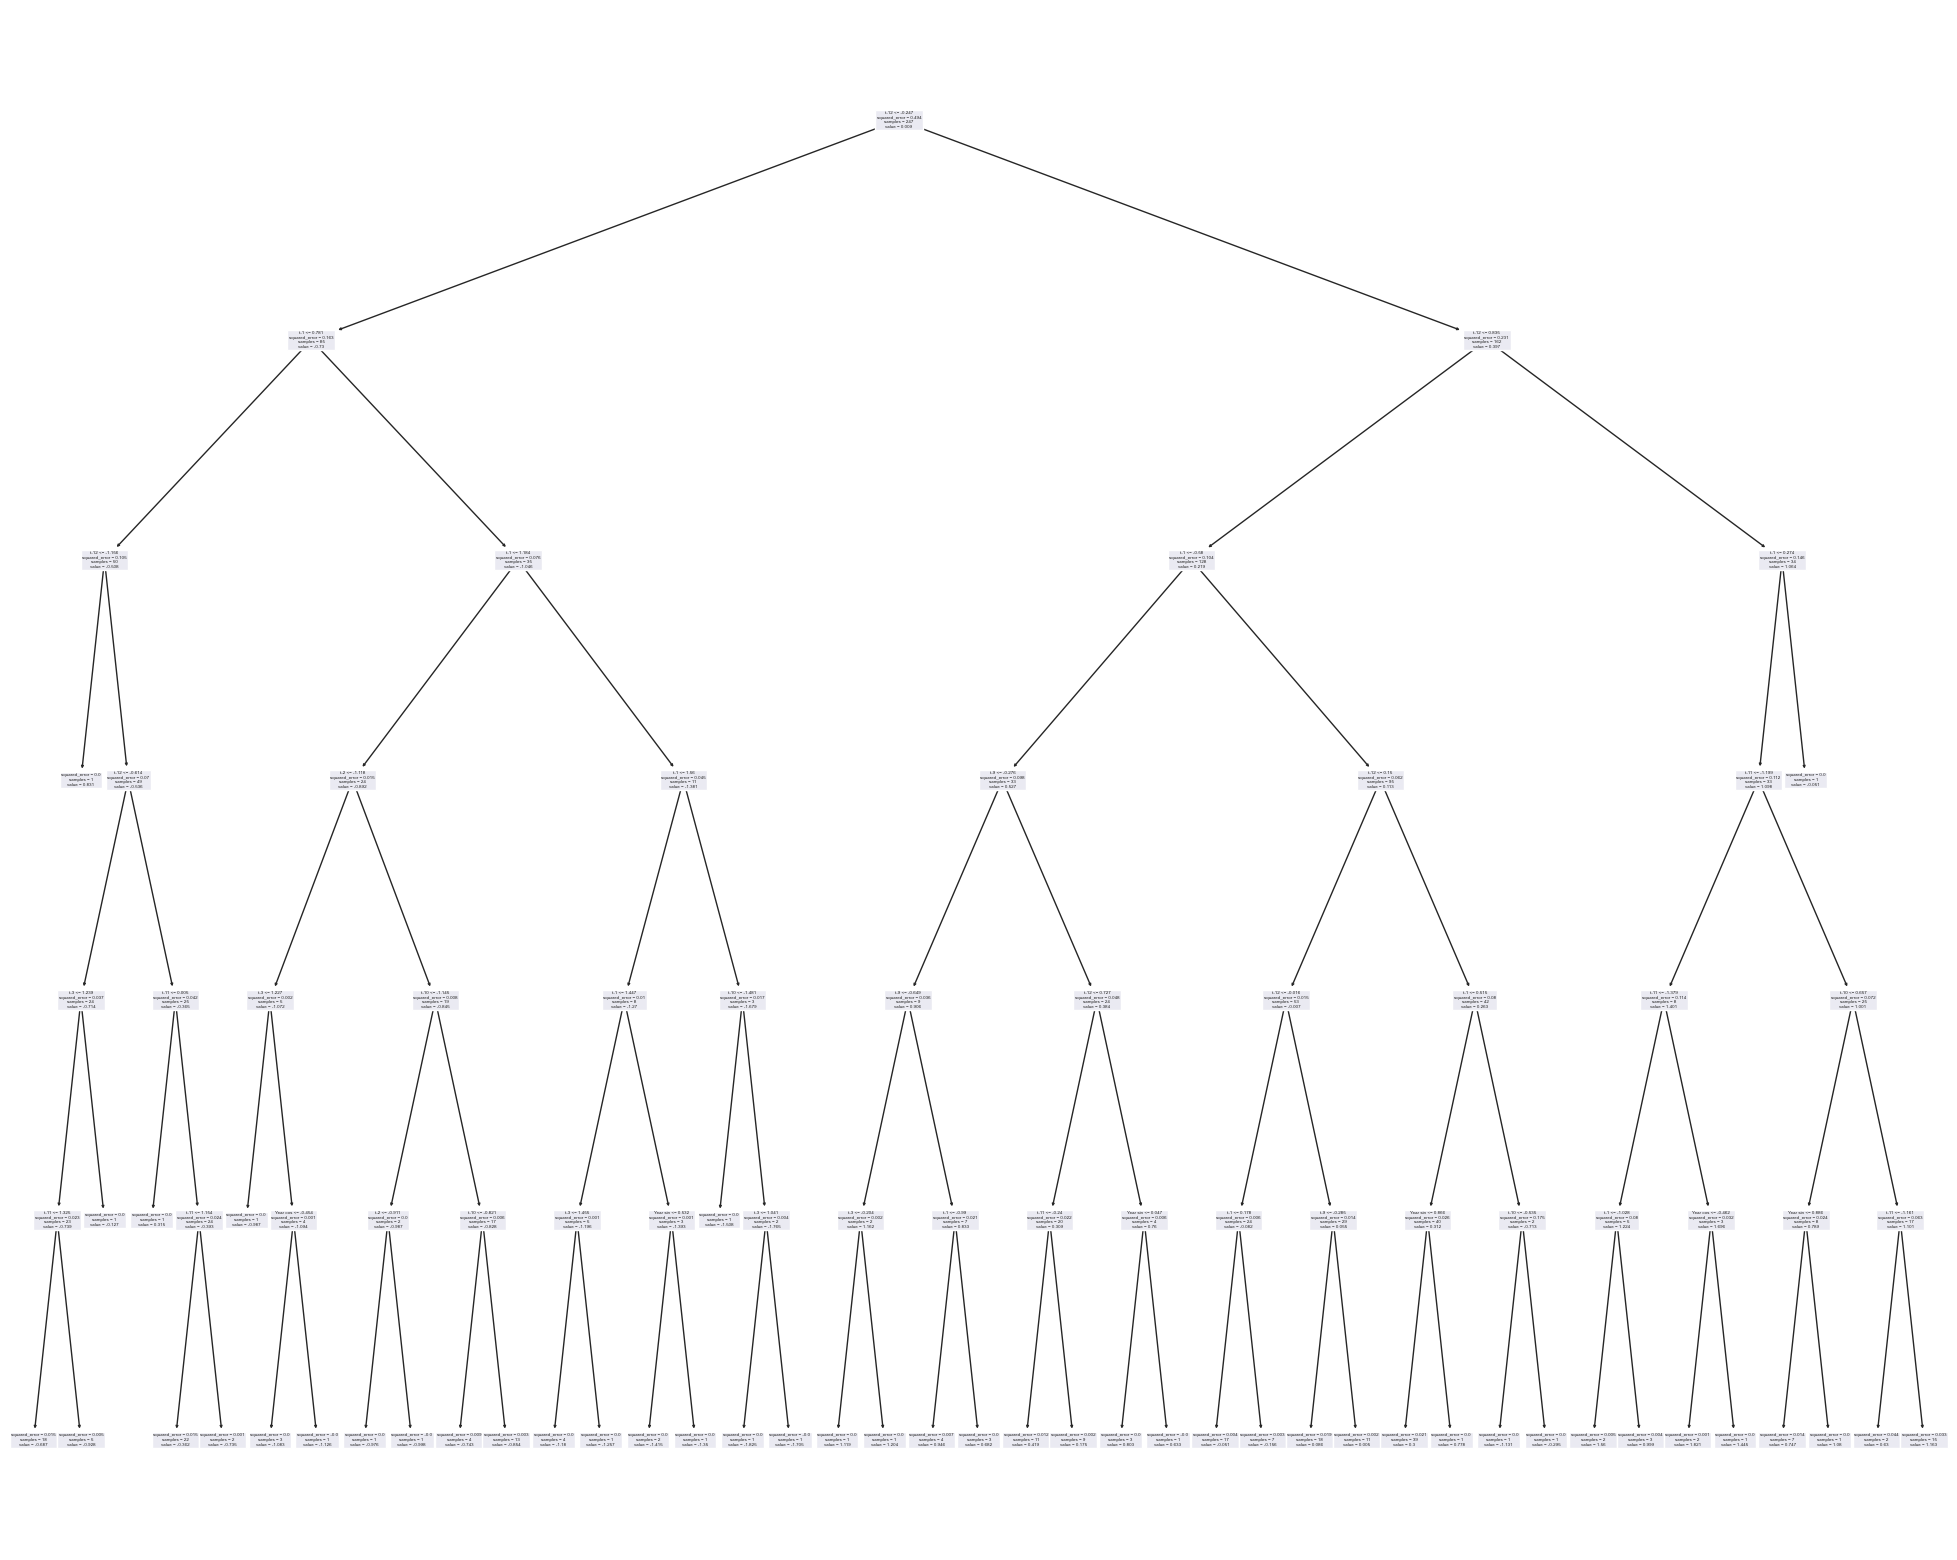

In [98]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_renta,
                   feature_names=listacaract)

Verficando las dimensiones del conjunto de prueba y del conjunto de entrenamiento para hacer las gráficas de comparación entre los verdaderos valores y sus pronósticos.

In [99]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

247
247
28
28


In [100]:
indicetrian_val_test=df1_renta.index
print(indicetrian_val_test.size)  ###Tamaño del índice
indicetrain_val=indicetrian_val_test[0:247]
indicetest=indicetrian_val_test[247:275]

275


In [101]:
print(indicetrain_val.size)
print(indicetest.size)

247
28


In [102]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

275
275


**Observados vs predichos modelos con profundidad 3**

In [103]:
d = {'Observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_val_test)
ObsvsPred.head(16)

,Observado,Predicción
2001-02-28,0.530,0.300
2001-03-31,-0.696,-0.687
2001-04-30,1.080,1.080
2001-05-31,-0.992,-0.854
2001-06-30,0.881,0.946
2001-07-31,-0.840,-0.854
2001-08-31,0.487,0.419
2001-09-30,-0.624,-0.362
2001-10-31,0.367,0.419
2001-11-30,-0.313,-0.362


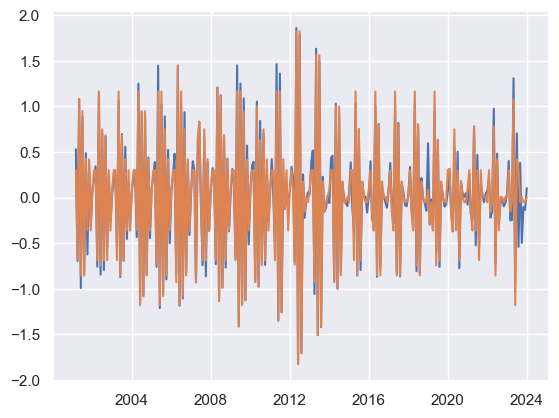

In [104]:
plt.plot(ObsvsPred)

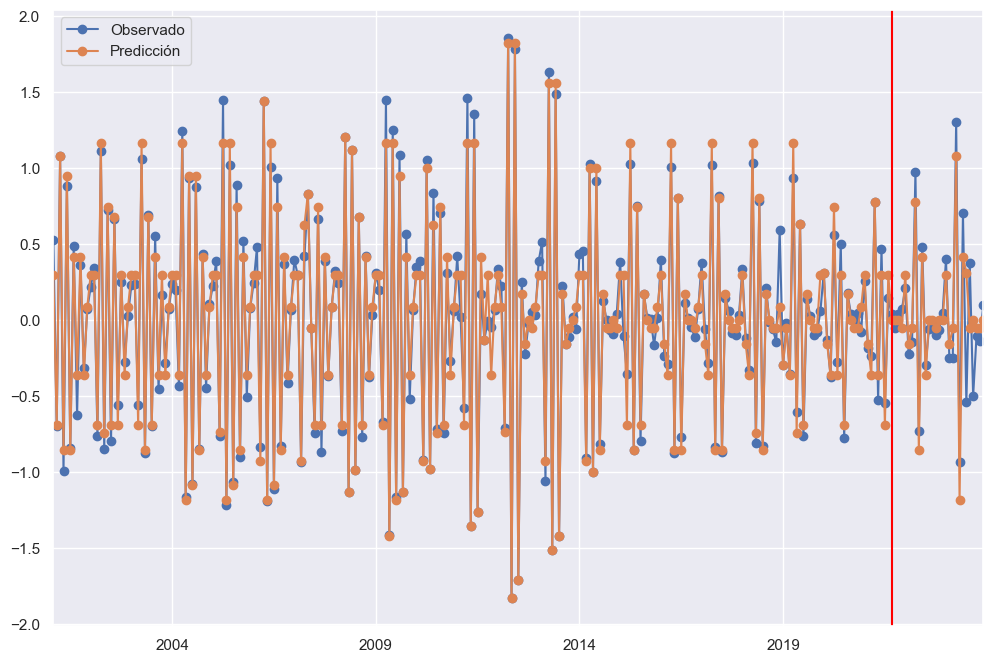

In [118]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_val_test[247].date(),color='red')

In [106]:
ObsvsPred

,Observado,Predicción
2001-02-28,0.530,0.300
2001-03-31,-0.696,-0.687
2001-04-30,1.080,1.080
2001-05-31,-0.992,-0.854
2001-06-30,0.881,0.946
...,...,...
2023-08-31,0.380,-0.051
2023-09-30,-0.498,0.005
2023-10-31,-0.102,-0.051
2023-11-30,-0.135,-0.051


In [66]:
ObsvsPred.tail(15)

,Observado,Predicción
2022-10-31,-0.097,-0.050
2022-11-30,-0.061,0.049
2022-12-31,0.046,0.229
2023-01-31,0.401,0.280
2023-02-28,-0.250,-0.156
2023-03-31,-0.247,-0.050
2023-04-30,1.308,0.665
2023-05-31,-0.933,-1.257
2023-06-30,0.703,0.375
2023-07-31,-0.540,-0.457


Dado que se diferencio una vez, ahora volvemos los datos a su escala original

In [1]:
### Funcion correcta para volver a los valores originales
def diferencia(n,x,dif):
  vector=np.array([x])
  for i in range(0,n):
    a=vector[0]
    b=dif[i]
    res=vector[i]+b
    vector=np.append(vector,res)
  return(vector)

### Volviendo a la escala original los valores reales y las predicciones

In [109]:
df=ObsvsPred['Observado']
df=np.array(df)

In [110]:
obsescalado=diferencia(275,13.395,df)
obsescalado=np.exp(obsescalado)

In [111]:
### Ahora vamos a hacer lo mismo pero para las predicciones
df2=ObsvsPred['Predicción']
df2=np.array(df2)

In [112]:
predescalado=diferencia(275,13.395,df2)
predescalado=np.exp(predescalado)

In [123]:
df = {'Observado': obsescalado, 'Predicción': predescalado}
df2=pd.DataFrame(data=df,index=indice[12:288])

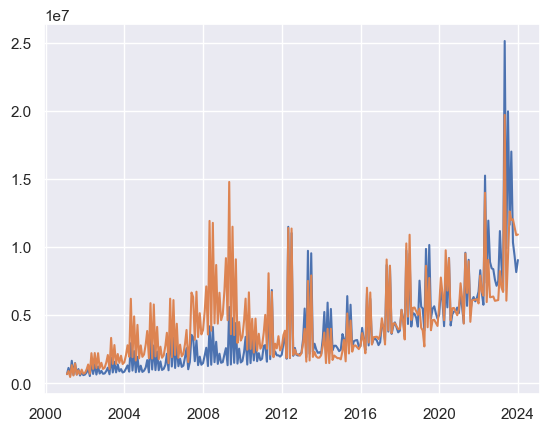

In [124]:
plt.plot(df2)

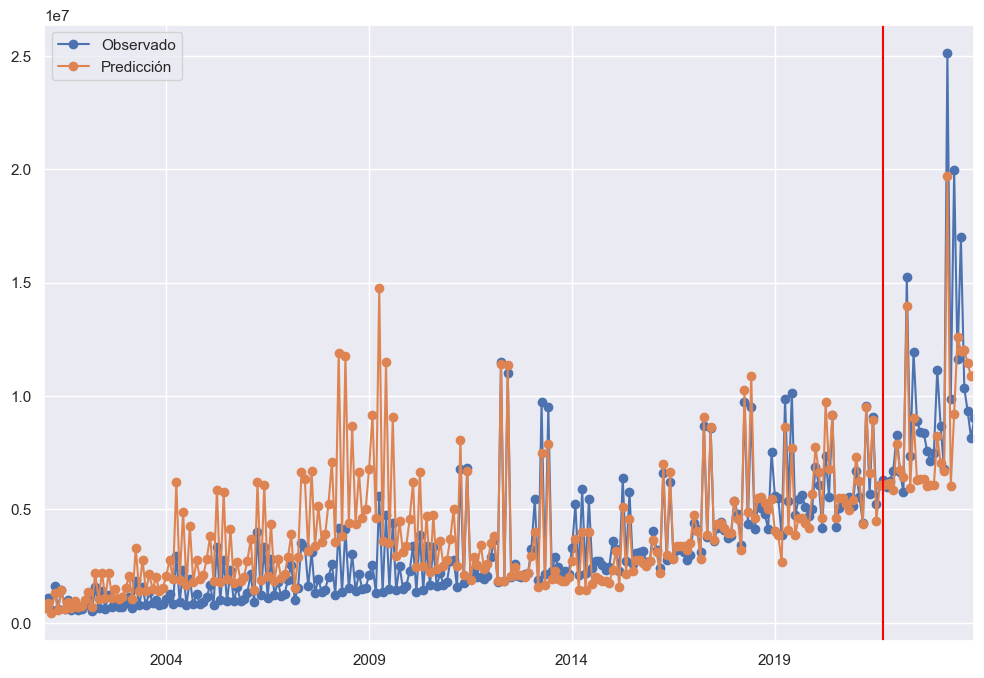

In [119]:
ax = df2.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_val_test[247].date(),color='red')

In [125]:
# Calcular el error cuadrático medio
import tensorflow as tf
mse = tf.square(obsescalado[247:288] - predescalado[247:288])
mse_mean = tf.reduce_mean(mse)

# Calcular la raíz cuadrada de la media para obtener el RMSE
rmse = tf.sqrt(mse_mean)

print("RECM:", rmse.numpy())

RECM: 2934669.3073033425


<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Embag\AppData\Local\Temp\ipykernel_9184\3551949538.py:3: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat{e}$ en conjunto de prueba', fontsize=14)


Text(0, 0.5, '$\\hat{e}$ en conjunto de prueba')

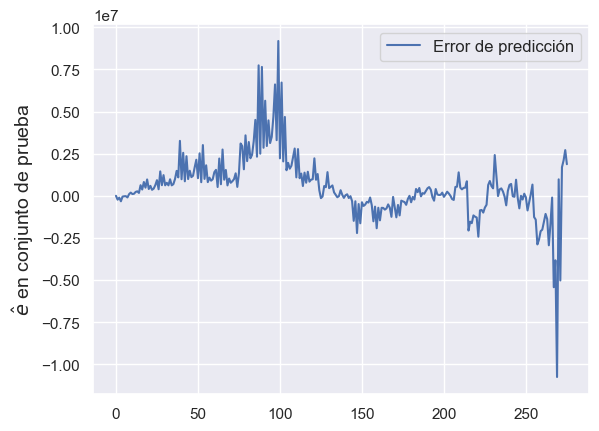

In [115]:
plt.plot(predescalado-obsescalado)
plt.legend(['Error de predicción'],loc="best", fontsize=12)
plt.ylabel('$\hat{e}$ en conjunto de prueba', fontsize=14)

In [5]:
rentad=renta.diff()

In [6]:
vector=np.array(2,4,3,5)

TypeError: array() takes from 1 to 2 positional arguments but 4 were given